# Analyzing CIA Factbook Data Using SQLite and Python

## Exploring the database

We'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

- `name` - The name of the country.
- `area` - The total land and sea area of the country.
- `population` - The country's population.
- `population_growth` - The country's population growth as a percentage.
- `birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.
- `death_rate` - The country's death rate, or the number of death a year per 1,000 people.
- `area- The` country's total area (both land and water).
- `area_land` - The country's land area in square kilometers.
- `area_water` - The country's waterarea in square kilometers.

In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect("factbook.db")

In [3]:
q1 = "select * FROM sqlite_master where type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
conn.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [5]:
# return the first 5 rows of the facts table in the database
q2 = "select * from facts limit 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Calculating summary statistics

In [7]:
# returns the minimum population, maximum population, minimum population growth, maximum population growth
q3 = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(q3, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [13]:
# return the countrie(s) with a population of 0
q4 = '''select name, population
from facts
where population = (select min(population) from facts);
'''
pd.read_sql_query(q4, conn)

,name,population
0,Antarctica,0


In [14]:
# return the countrie(s) with a population of 7256490011
q5 = '''select name, population
from facts
where population = (select max(population) from facts);
'''
pd.read_sql_query(q5, conn)

,name,population
0,World,7256490011


## Visualizing the data

Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:
- `population`
- `population_growth`
- `birth_rate`
- `death_rate`

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002081DF50EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002081E386470>]], dtype=object)

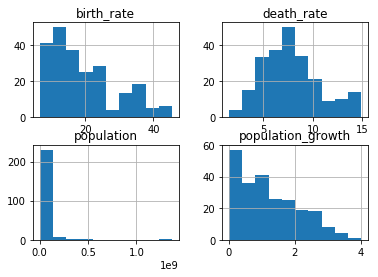

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

import warnings
warnings.filterwarnings('ignore')

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts) and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax)